<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Sign_Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning Libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
train = pd.read_csv('/content/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205.0,206.0,206.0,207.0,207.0,206.0,206.0,204.0,205.0,204.0,203.0,202.0,142.0,151.0,160.0,172.0,196.0,188.0,188.0,190.0,135.0,96.0,86.0,77.0,77.0,79.0,176.0,205.0,207.0,207.0,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100.0,78.0,120.0,157.0,168.0,107.0,99.0,121.0,133.0,97.0,95.0,120.0,135.0,116.0,95.0,79.0,69.0,86.0,139.0,173.0,200.0,185.0,175.0,198.0,124.0,118.0,94.0,140.0,133.0,84.0,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203.0,204.0,203.0,201.0,200.0,200.0,199.0,198.0,196.0,195.0,194.0,193.0,198.0,166.0,132.0,114.0,89.0,74.0,79.0,77.0,74.0,78.0,132.0,188.0,210.0,209.0,206.0,205.0,204.0,203.0,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247.0,242.0,233.0,231.0,230.0,229.0,227.0,225.0,223.0,221.0,220.0,216.0,58.0,51.0,49.0,50.0,57.0,60.0,17.0,15.0,18.0,17.0,19.0,1.0,159.0,255.0,237.0,239.0,237.0,236.0,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90.0,77.0,88.0,117.0,123.0,127.0,129.0,134.0,145.0,152.0,156.0,179.0,105.0,106.0,105.0,104.0,104.0,104.0,175.0,199.0,178.0,152.0,136.0,130.0,136.0,150.0,118.0,92.0,85.0,76.0,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131.0,134.0,144.0,147.0,125.0,87.0,87.0,103.0,107.0,110.0,116.0,113.0,75.0,74.0,74.0,74.0,76.0,74.0,82.0,134.0,168.0,155.0,146.0,137.0,145.0,146.0,149.0,135.0,124.0,125.0,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114.0,112.0,89.0,48.0,133.0,194.0,182.0,185.0,184.0,184.0,182.0,181.0,172.0,174.0,177.0,178.0,178.0,179.0,181.0,183.0,187.0,175.0,165.0,154.0,118.0,107.0,100.0,75.0,96.0,83.0,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145.0,123.0,78.0,162.0,239.0,227.0,229.0,226.0,226.0,225.0,224.0,222.0,89.0,91.0,94.0,111.0,136.0,154.0,167.0,184.0,125.0,3.0,166.0,225.0,195.0,188.0,172.0,185.0,161.0,122.0,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85.0,80.0,84.0,151.0,238.0,255.0,255.0,250.0,237.0,245.0,250.0,232.0,103.0,101.0,102.0,103.0,95.0,208.0,231.0,227.0,209.0,190.0,179.0,182.0,152.0,150.0,159.0,119.0,83.0,63.0,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93.0,52.0,24.0,53.0,63.0,33.0,41.0,51.0,48.0,45.0,49.0,55.0,149.0,150.0,150.0,148.0,147.0,151.0,124.0,82.0,84.0,81.0,69.0,81.0,111.0,103.0,84.0,75.0,53.0,28.0,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


In [ ]:
train.shape

(5527, 785)

In [ ]:
test.shape

(2762, 785)

In [ ]:
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

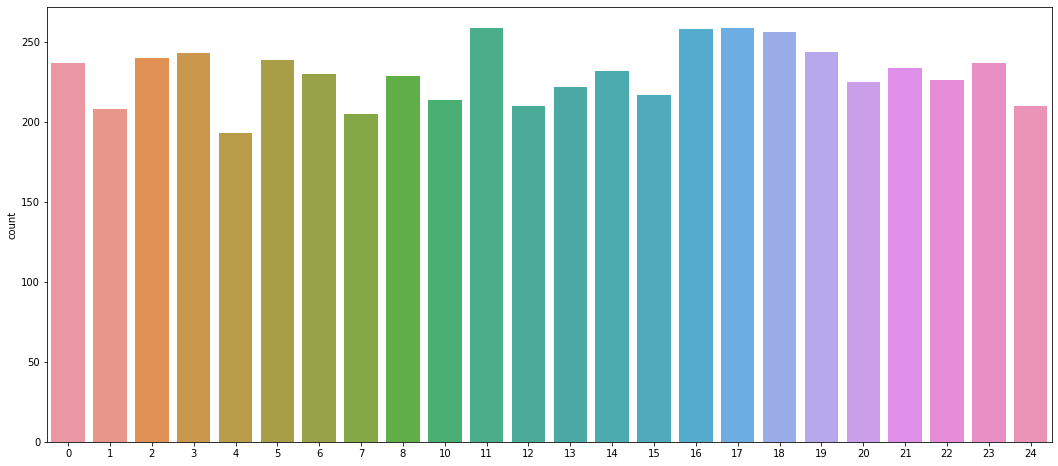

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)
plt.show()

In [ ]:
train.drop('label', axis = 1, inplace = True)

In [ ]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

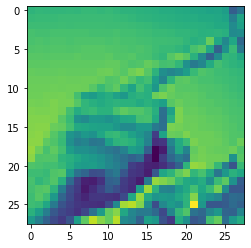

In [ ]:
plt.imshow(images[1].reshape(28,28))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
batch_size = 128
num_classes = 24
epochs = 50

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

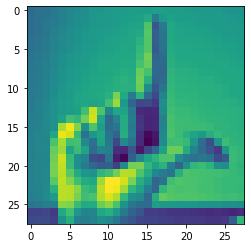

In [ ]:
plt.imshow(x_train[4].reshape(28,28))
plt.show()

## Generating CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/50
31/31 [==============================] - 7s 188ms/step - loss: 3.1745 - accuracy: 0.0447 - val_loss: nan - val_accuracy: 0.0561
Epoch 2/50
31/31 [==============================] - 6s 187ms/step - loss: 3.1151 - accuracy: 0.0915 - val_loss: nan - val_accuracy: 0.1308
Epoch 3/50
31/31 [==============================] - 7s 215ms/step - loss: 2.7518 - accuracy: 0.1631 - val_loss: nan - val_accuracy: 0.2502
Epoch 4/50
31/31 [==============================] - 6s 201ms/step - loss: 2.3069 - accuracy: 0.2505 - val_loss: nan - val_accuracy: 0.3623
Epoch 5/50
31/31 [==============================] - 6s 186ms/step - loss: 2.0064 - accuracy: 0.3294 - val_loss: nan - val_accuracy: 0.4436
Epoch 6/50
31/31 [==============================] - 6s 185ms/step - loss: 1.7798 - accuracy: 0.4007 - val_loss: nan - val_accuracy: 0.5214
Epoch 7/50
31/31 [==============================] - 6s 185ms/step - loss: 1.5719 - accuracy: 0.4703 - val_loss: nan - val_accuracy: 0.5660
Epoch 8/50
31/31 [=========

In [ ]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [ ]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.7877858337981037